# Food Deserts in Northern CA
---

## ...

In [1]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
food_deserts_usa = pd.read_csv("Resources/StateAndCountyData.csv")

# Display sample data
food_deserts_usa.head()

FIPS State   County          Variable_Code         Value
0  1001    AL  Autauga          LACCESS_POP10  18428.439690
1  1001    AL  Autauga          LACCESS_POP15  17496.693040
2  1001    AL  Autauga  PCH_LACCESS_POP_10_15     -5.056026
3  1001    AL  Autauga      PCT_LACCESS_POP10     33.769657
4  1001    AL  Autauga      PCT_LACCESS_POP15     32.062255

---

### Create Clean DataFrames for CA, The Bay Area, Greater Sacremento, and The Cental Valley.

In [3]:
#create a df that includes only the Counties in CA
food_deserts_ca = food_deserts_usa.loc[food_deserts_usa['State'] == 'CA']
del food_deserts_ca['State'] 

food_deserts_ca

FIPS   County          Variable_Code         Value
7625    6001  Alameda          LACCESS_POP10  1.604249e+05
7626    6001  Alameda          LACCESS_POP15  1.079644e+05
7627    6001  Alameda  PCH_LACCESS_POP_10_15 -3.270098e+01
7628    6001  Alameda      PCT_LACCESS_POP10  1.062226e+01
7629    6001  Alameda      PCT_LACCESS_POP15  7.148677e+00
...      ...      ...                    ...           ...
850873     6    Total  State_Population_2014  3.862514e+07
850874     6    Total  State_Population_2015  3.895314e+07
850875     6    Total  State_Population_2016  3.920913e+07
850876     6    Total  State_Population_2017  3.939935e+07
850877     6    Total  State_Population_2018  3.955704e+07

[15739 rows x 4 columns]

In [4]:
#Rotate the "Variable Codes" into the columns and then match them with the corresponding "Values" 
food_deserts_ca = food_deserts_ca.pivot_table(index='County', columns='Variable_Code', values='Value')
food_deserts_ca.head()

Variable_Code  AGRITRSM_OPS07  AGRITRSM_OPS12  AGRITRSM_RCT07  AGRITRSM_RCT12  \
County                                                                          
Alameda                   4.0            16.0         29000.0        196000.0   
Alpine                    0.0             0.0             0.0             0.0   
Amador                    5.0            13.0             NaN       1037000.0   
Butte                    22.0            38.0        287000.0        392000.0   
Calaveras                 6.0            20.0        116000.0       1493000.0   

Variable_Code  BERRY_ACRES07  BERRY_ACRES12  BERRY_ACRESPTH07  \
County                                                          
Alameda                  NaN            2.0               NaN   
Alpine                   0.0            0.0          0.000000   
Amador                   NaN            2.0               NaN   
Butte                   65.0           84.0          0.298893   
Calaveras               23.0           20.0          0.497104   

Variable_Code  BERRY_ACRESPTH12  BERRY_FARMS07  BERRY_FARMS12  ...  WICS16  \
County                                                         ...           
Alameda                0.001285            1.0            8.0  ...   145.0   
Alpine                 0.000000            0.0            0.0  ...     NaN   
Amador                 0.053910            2.0           11.0  ...     9.0   
Butte                  0.379738           33.0           34.0  ...    23.0   
Calaveras              0.446877           14.0           14.0  ...     7.0   

Variable_Code  WICSPTH11  WICSPTH16  WIC_PART_2012  WIC_PART_2013  \
County                                                              
Alameda         0.116264   0.087862            NaN            NaN   
Alpine               NaN        NaN            NaN            NaN   
Amador          0.239757   0.240397            NaN            NaN   
Butte           0.131847   0.101532            NaN            NaN   
Calaveras       0.243578   0.154515            NaN            NaN   

Variable_Code  WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  \
County                                                                      
Alameda                  NaN            NaN            NaN            NaN   
Alpine                   NaN            NaN            NaN            NaN   
Amador                   NaN            NaN            NaN            NaN   
Butte                    NaN            NaN            NaN            NaN   
Calaveras                NaN            NaN            NaN            NaN   

Variable_Code  WIC_PART_2018  
County                        
Alameda                  NaN  
Alpine                   NaN  
Amador                   NaN  
Butte                    NaN  
Calaveras                NaN  

[5 rows x 323 columns]

In [5]:
#print the California data to a csv
food_deserts_ca.to_csv("Outputs/all_ca_data.csv", index_label="County")

### Step 2: Narrow down the `food_deserts_ca` DataFrame to regions

In [6]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
bay_area_desert = food_deserts_ca.loc[bay_area_counties]

bay_area_desert

Variable_Code  AGRITRSM_OPS07  AGRITRSM_OPS12  AGRITRSM_RCT07  AGRITRSM_RCT12  \
County                                                                          
Alameda                   4.0            16.0         29000.0        196000.0   
Contra Costa             13.0            33.0        487000.0        665000.0   
Marin                     9.0            30.0             NaN         99000.0   
Napa                     29.0           119.0       1816000.0      23723000.0   
San Francisco             0.0             0.0             0.0             0.0   
San Mateo                 7.0             8.0        977000.0        520000.0   
Santa Clara              17.0            57.0       1091000.0        642000.0   
Solano                   13.0            44.0       1742000.0       1557000.0   
Sonoma                   46.0           135.0       1934000.0       3894000.0   

Variable_Code  BERRY_ACRES07  BERRY_ACRES12  BERRY_ACRESPTH07  \
County                                                          
Alameda                  NaN            2.0               NaN   
Contra Costa            27.0           19.0          0.026755   
Marin                    4.0           10.0          0.016244   
Napa                    15.0           13.0          0.113137   
San Francisco            0.0            0.0          0.000000   
San Mateo                NaN           39.0               NaN   
Santa Clara             94.0           96.0          0.054906   
Solano                  26.0           35.0          0.063688   
Sonoma                 125.0          159.0          0.267462   

Variable_Code  BERRY_ACRESPTH12  BERRY_FARMS07  BERRY_FARMS12  ...  WICS16  \
County                                                         ...           
Alameda                0.001285            1.0            8.0  ...   145.0   
Contra Costa           0.017604           13.0           22.0  ...    95.0   
Marin                  0.039059            9.0           15.0  ...    16.0   
Napa                   0.093488            8.0           13.0  ...    18.0   
San Francisco          0.000000            0.0            0.0  ...    42.0   
San Mateo              0.052657            7.0           24.0  ...    64.0   
Santa Clara            0.052137           13.0           30.0  ...   145.0   
Solano                 0.083262           10.0            6.0  ...    47.0   
Sonoma                 0.323997           58.0           97.0  ...    55.0   

Variable_Code  WICSPTH11  WICSPTH16  WIC_PART_2012  WIC_PART_2013  \
County                                                              
Alameda         0.116264   0.087862            NaN            NaN   
Contra Costa    0.114505   0.083539            NaN            NaN   
Marin           0.078320   0.061389            NaN            NaN   
Napa            0.166969   0.127492            NaN            NaN   
San Francisco   0.077236   0.048121            NaN            NaN   
San Mateo       0.101592   0.083311            NaN            NaN   
Santa Clara     0.089396   0.075146            NaN            NaN   
Solano          0.110496   0.106988            NaN            NaN   
Sonoma          0.139509   0.109290            NaN            NaN   

Variable_Code  WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  \
County                                                                      
Alameda                  NaN            NaN            NaN            NaN   
Contra Costa             NaN            NaN            NaN            NaN   
Marin                    NaN            NaN            NaN            NaN   
Napa                     NaN            NaN            NaN            NaN   
San Francisco            NaN            NaN            NaN            NaN   
San Mateo                NaN            NaN            NaN            NaN   
Santa Clara              NaN            NaN            NaN            NaN   
Solano                   NaN            NaN            NaN            NaN   
Son

In [7]:
sacramento_counties = ['Amador', 'Calaveras', 'El Dorado', 'Placer', 
                        'Sacramento', 'Yolo']
    
sacramento_desert = food_deserts_ca.loc[sacramento_counties]
sacramento_desert

Variable_Code  AGRITRSM_OPS07  AGRITRSM_OPS12  AGRITRSM_RCT07  AGRITRSM_RCT12  \
County                                                                          
Amador                    5.0            13.0             NaN       1037000.0   
Calaveras                 6.0            20.0        116000.0       1493000.0   
El Dorado                19.0            42.0       2539000.0       1146000.0   
Placer                   22.0            20.0        302000.0         72000.0   
Sacramento               18.0            45.0        435000.0       1137000.0   
Yolo                     20.0            23.0        361000.0        734000.0   

Variable_Code  BERRY_ACRES07  BERRY_ACRES12  BERRY_ACRESPTH07  \
County                                                          
Amador                   NaN            2.0               NaN   
Calaveras               23.0           20.0          0.497104   
El Dorado               66.0          127.0          0.371425   
Placer                  97.0           53.0          0.294812   
Sacramento              96.0          117.0          0.069507   
Yolo                    55.0           60.0          0.283011   

Variable_Code  BERRY_ACRESPTH12  BERRY_FARMS07  BERRY_FARMS12  ...  WICS16  \
County                                                         ...           
Amador                 0.053910            2.0           11.0  ...     9.0   
Calaveras              0.446877           14.0           14.0  ...     7.0   
El Dorado              0.703293           58.0           87.0  ...    19.0   
Placer                 0.146727           43.0           56.0  ...    43.0   
Sacramento             0.080775           32.0           46.0  ...   158.0   
Yolo                   0.292550           16.0           22.0  ...    27.0   

Variable_Code  WICSPTH11  WICSPTH16  WIC_PART_2012  WIC_PART_2013  \
County                                                              
Amador          0.239757   0.240397            NaN            NaN   
Calaveras       0.243578   0.154515            NaN            NaN   
El Dorado       0.105020   0.102106            NaN            NaN   
Placer          0.103842   0.113370            NaN            NaN   
Sacramento      0.119966   0.104531            NaN            NaN   
Yolo            0.158448   0.125273            NaN            NaN   

Variable_Code  WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  \
County                                                                      
Amador                   NaN            NaN            NaN            NaN   
Calaveras                NaN            NaN            NaN            NaN   
El Dorado                NaN            NaN            NaN            NaN   
Placer                   NaN            NaN            NaN            NaN   
Sacramento               NaN            NaN            NaN            NaN   
Yolo                     NaN            NaN            NaN            NaN   

Variable_Code  WIC_PART_2018  
County                        
Amador                   NaN  
Calaveras                NaN  
El Dorado                NaN  
Placer                   NaN  
Sacramento               NaN  
Yolo                     NaN  

[6 rows x 323 columns]

In [8]:
central_valley_counties = ['Fresno', 'Kern', 'Kings', 
                            'Madera', 'Mariposa', 'Merced', 'San Joaquin', 
                            'Stanislaus', 'Tulare', 'Tuolumne']

central_valley_desert =  food_deserts_ca.loc[central_valley_counties]
central_valley_desert

Variable_Code  AGRITRSM_OPS07  AGRITRSM_OPS12  AGRITRSM_RCT07  AGRITRSM_RCT12  \
County                                                                          
Fresno                   15.0            39.0        442000.0        743000.0   
Kern                     11.0            27.0        594000.0       1091000.0   
Kings                     0.0             8.0             0.0         46000.0   
Madera                    6.0            16.0        546000.0        986000.0   
Mariposa                  6.0            12.0         17000.0         69000.0   
Merced                   12.0            35.0        632000.0        405000.0   
San Joaquin              11.0            23.0        913000.0        427000.0   
Stanislaus               10.0            28.0        484000.0        134000.0   
Tulare                    7.0            17.0             NaN        263000.0   
Tuolumne                  6.0            18.0        390000.0        664000.0   

Variable_Code  BERRY_ACRES07  BERRY_ACRES12  BERRY_ACRESPTH07  \
County                                                          
Fresno                 559.0          603.0          0.623931   
Kern                  1112.0         1942.0          1.384323   
Kings                   32.0           22.0          0.212738   
Madera                  23.0           95.0          0.157462   
Mariposa                 NaN            NaN               NaN   
Merced                 134.0          462.0          0.539149   
San Joaquin            257.0          437.0          0.384684   
Stanislaus              95.0          140.0          0.187069   
Tulare                 512.0          596.0          1.212868   
Tuolumne                 8.0            NaN          0.141998   

Variable_Code  BERRY_ACRESPTH12  BERRY_FARMS07  BERRY_FARMS12  ...  WICS16  \
County                                                         ...           
Fresno                 0.636269           43.0           43.0  ...   216.0   
Kern                   2.267166           20.0           27.0  ...   189.0   
Kings                  0.145502            5.0           21.0  ...    22.0   
Madera                 0.624343            9.0           12.0  ...    29.0   
Mariposa                    NaN            2.0            7.0  ...     1.0   
Merced                 1.764787           13.0           30.0  ...    60.0   
San Joaquin            0.622983           17.0           38.0  ...    80.0   
Stanislaus             0.268149           25.0           22.0  ...    89.0   
Tulare                 1.320869           34.0           64.0  ...    87.0   
Tuolumne                    NaN           10.0            3.0  ...     8.0   

Variable_Code  WICSPTH11  WICSPTH16  WIC_PART_2012  WIC_PART_2013  \
County                                                              
Fresno          0.301231   0.220869            NaN            NaN   
Kern            0.271182   0.214198            NaN            NaN   
Kings           0.164597   0.147148            NaN            NaN   
Madera          0.224124   0.188116            NaN            NaN   
Mariposa        0.110084   0.057290            NaN            NaN   
Merced          0.273779   0.223905            NaN            NaN   
San Joaquin     0.155533   0.109262            NaN            NaN   
Stanislaus      0.220241   0.164955            NaN            NaN   
Tulare          0.221544   0.189121            NaN            NaN   
Tuolumne        0.145919   0.148965            NaN            NaN   

Variable_Code  WIC_PART_2014  WIC_PART_2015  WIC_PART_2016  WIC_PART_2017  \
County                                                                      
Fresno                   NaN            NaN            NaN            NaN   
Kern                     NaN            NaN            NaN            NaN   
Kings                    NaN            NaN            NaN            NaN   
Madera                   NaN            NaN            NaN            NaN   
Mariposa          

In [9]:
regions_desert = pd.concat([central_valley_desert, sacramento_desert, bay_area_desert])
regions_desert

Variable_Code  AGRITRSM_OPS07  AGRITRSM_OPS12  AGRITRSM_RCT07  AGRITRSM_RCT12  \
County                                                                          
Fresno                   15.0            39.0        442000.0        743000.0   
Kern                     11.0            27.0        594000.0       1091000.0   
Kings                     0.0             8.0             0.0         46000.0   
Madera                    6.0            16.0        546000.0        986000.0   
Mariposa                  6.0            12.0         17000.0         69000.0   
Merced                   12.0            35.0        632000.0        405000.0   
San Joaquin              11.0            23.0        913000.0        427000.0   
Stanislaus               10.0            28.0        484000.0        134000.0   
Tulare                    7.0            17.0             NaN        263000.0   
Tuolumne                  6.0            18.0        390000.0        664000.0   
Amador                    5.0            13.0             NaN       1037000.0   
Calaveras                 6.0            20.0        116000.0       1493000.0   
El Dorado                19.0            42.0       2539000.0       1146000.0   
Placer                   22.0            20.0        302000.0         72000.0   
Sacramento               18.0            45.0        435000.0       1137000.0   
Yolo                     20.0            23.0        361000.0        734000.0   
Alameda                   4.0            16.0         29000.0        196000.0   
Contra Costa             13.0            33.0        487000.0        665000.0   
Marin                     9.0            30.0             NaN         99000.0   
Napa                     29.0           119.0       1816000.0      23723000.0   
San Francisco             0.0             0.0             0.0             0.0   
San Mateo                 7.0             8.0        977000.0        520000.0   
Santa Clara              17.0            57.0       1091000.0        642000.0   
Solano                   13.0            44.0       1742000.0       1557000.0   
Sonoma                   46.0           135.0       1934000.0       3894000.0   

Variable_Code  BERRY_ACRES07  BERRY_ACRES12  BERRY_ACRESPTH07  \
County                                                          
Fresno                 559.0          603.0          0.623931   
Kern                  1112.0         1942.0          1.384323   
Kings                   32.0           22.0          0.212738   
Madera                  23.0           95.0          0.157462   
Mariposa                 NaN            NaN               NaN   
Merced                 134.0          462.0          0.539149   
San Joaquin            257.0          437.0          0.384684   
Stanislaus              95.0          140.0          0.187069   
Tulare                 512.0          596.0          1.212868   
Tuolumne                 8.0            NaN          0.141998   
Amador                   NaN            2.0               NaN   
Calaveras               23.0           20.0          0.497104   
El Dorado               66.0          127.0          0.371425   
Placer                  97.0           53.0          0.294812   
Sacramento              96.0          117.0          0.069507   
Yolo                    55.0           60.0          0.283011   
Alameda                  NaN            2.0               NaN   
Contra Costa            27.0           19.0          0.026755   
Marin                    4.0           10.0          0.016244   
Napa                    15.0           13.0          0.113137   
San Francisco            0.0            0.0          0.000000   
San Mateo                NaN           39.0               NaN   
Santa Clara             94.0           96.0          0.054906   
Solano                  26.0           35.0          0.063688   
Sonoma                 125.0          159.0          0.267462   

Variable_Code  BERRY_ACRESPTH12  BERRY_FARMS07  BERRY_FA

In [10]:
#print the data for three regions we are focusing on to a csv
regions_desert.to_csv("Outputs/combined_regions_data.csv", index_label="County")

In [11]:
#pull health data columns
health_data_columns = ['PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS12', 'PCT_OBESE_ADULTS17', 'PCT_HSPA17', 'RECFAC11', 'RECFAC16', 'PCH_RECFAC_11_16', 'RECFACPTH11', 'RECFACPTH16', 'PCH_RECFACPTH_11_16']
health_data = regions_desert[health_data_columns]

In [12]:
#rename health data columns
health_data = health_data.rename (columns = {
    'PCT_DIABETES_ADULTS08': 'Diabetes 2008',
    'PCT_DIABETES_ADULTS13': 'Diabetes 2013',
    'PCT_OBESE_ADULTS12': 'Obesity 2012',
    'PCT_OBESE_ADULTS17': 'Obesity 2017',
    'PCT_HSPA17': 'Physical Activity 2017',
    'RECFAC11': 'Recreation Facilities 2011',
    'RECFAC16': 'Recreation Facilities 2016',
    'PCH_RECFAC_11_16': 'Percent Change Recreation Facilities 2011-2016',
    'RECFACPTH11': 'Recreation Facilities Per-1000 2011',
    'RECFACPTH16': 'Recreation Facilities Per-1000 2016',
    'PCH_RECFACPTH_11_16': 'Percent Change Recreation Facilities Per-1000 2011_2016'
})


health_data

Variable_Code  Diabetes 2008  Diabetes 2013  Obesity 2012  Obesity 2017  \
County                                                                    
Fresno                   8.5            9.4          25.0          25.1   
Kern                     7.0            9.3          25.0          25.1   
Kings                    5.7            7.5          25.0          25.1   
Madera                   7.8            7.9          25.0          25.1   
Mariposa                 8.3           10.7          25.0          25.1   
Merced                   7.5            9.2          25.0          25.1   
San Joaquin              7.9           10.3          25.0          25.1   
Stanislaus               8.1            9.7          25.0          25.1   
Tulare                   7.6            8.0          25.0          25.1   
Tuolumne                 6.8           10.1          25.0          25.1   
Amador                   9.3           10.2          25.0          25.1   
Calaveras                7.3           10.0          25.0          25.1   
El Dorado                7.1            7.5          25.0          25.1   
Placer                   7.1            9.0          25.0          25.1   
Sacramento               8.4            8.4          25.0          25.1   
Yolo                     6.7            6.9          25.0          25.1   
Alameda                  7.6            8.5          25.0          25.1   
Contra Costa             7.0            9.4          25.0          25.1   
Marin                    6.4            7.9          25.0          25.1   
Napa                     7.3            8.4          25.0          25.1   
San Francisco            7.9            7.9          25.0          25.1   
San Mateo                6.8            8.3          25.0          25.1   
Santa Clara              7.4            8.4          25.0          25.1   
Solano                   9.9            9.8          25.0          25.1   
Sonoma                   6.6            7.9          25.0          25.1   

Variable_Code  Physical Activity 2017  Recreation Facilities 2011  \
County                                                              
Fresno                           27.5                        39.0   
Kern                             27.5                        41.0   
Kings                            27.5                        11.0   
Madera                           27.5                         7.0   
Mariposa                         27.5                         2.0   
Merced                           27.5                        13.0   
San Joaquin                      27.5                        36.0   
Stanislaus                       27.5                        38.0   
Tulare                           27.5                        15.0   
Tuolumne                         27.5                         6.0   
Amador                           27.5                         4.0   
Calaveras                        27.5                         5.0   
El Dorado                        27.5                        15.0   
Placer                           27.5                        47.0   
Sacramento                       27.5                       121.0   
Yolo                             27.5                        17.0   
Alameda                          27.5                       145.0   
Contra Costa                     27.5                       113.0   
Marin                            27.5                        56.0   
Napa                             27.5                        20.0   
San Francisco                    27.5                       111.0   
San Mateo                        27.5                       105.0   
Santa Clara                      27.5                       201.0   
Solano                           27.5                        38.0   
Sonoma                           27.5                        58.0   

Variable_Code  Recreation Facilities 2016  \
County                                      
Fresno              

In [13]:
#pull socioeconomics columns and rename
socioeconomics_columns =['PCT_NHWHITE10', 
                         'PCT_NHBLACK10', 
                         'PCT_HISP10',
                        'PCT_NHASIAN10',
                        'PCT_NHNA10',
                        'PCT_NHPI10',
                        'PCT_65OLDER10',
                        'PCT_18YOUNGER10',
                        'MEDHHINC15',
                        'POVRATE15',
                        'PERPOV10',
                        'CHILDPOVRATE15',
                        'PERCHLDPOV10',
                        'METRO13',
                        'POPLOSS10']
socioeconomics_data = regions_desert[socioeconomics_columns]
socioeconomics_data = socioeconomics_data.rename (columns = {
                        'PCT_NHWHITE10':'% White 2010', 
                        'PCT_NHBLACK10':'% Black 2010', 
                        'PCT_HISP10':'% Hispanic 2010',
                            'PCT_NHASIAN10': '% Asian 2010',
                            'PCT_NHNA10': '% Native American 2010',
                            'PCT_NHPI10': '% Pacific Islander 2010',
                            'PCT_65OLDER10': '% Pop 65+ Years 2010',
                            'PCT_18YOUNGER10': '% Pop under 18 years 2010',
                            'MEDHHINC15': 'Median Household Income 2015',
                            'POVRATE15': 'Poverty Rate 2015',
                            'PERPOV10': 'Persistent Poverty Rate Counties 2010',
                            'CHILDPOVRATE15':'Child Poverty Rate 2015',
                            'PERCHLDPOV10': 'Persistent Child Poverty Counties 2010',
                            'METRO13':'Metro/Nonmetro Counties 2010',
                            'POPLOSS10': 'Population Loss Counties 2010'
})
socioeconomics_data

Variable_Code  % White 2010  % Black 2010  % Hispanic 2010  % Asian 2010  \
County                                                                     
Fresno            32.728465      4.836907        50.305766      9.334838   
Kern              38.563845      5.404398        49.192205      3.942208   
Kings             35.219176      6.741970        50.898799      3.489953   
Madera            38.034004      3.320187        53.685083      1.678985   
Mariposa          83.239275      0.706811         9.183058      1.101310   
Merced            31.900404      3.434418        54.921362      7.108482   
San Joaquin       35.884554      7.082967        38.864536     13.796319   
Stanislaus        46.733715      2.539591        41.919864      4.803549   
Tulare            32.551297      1.243162        60.623639      3.212274   
Tuolumne          81.865800      2.012102        10.689063      0.957283   
Amador            79.611982      2.462524        12.485889      1.039616   
Calaveras         83.535916      0.778885        10.318575      1.160648   
El Dorado         79.913067      0.715793        12.081764      3.392835   
Placer            76.139390      1.270549        12.831772      5.729382   
Sacramento        48.433311      9.863982        21.581519     14.022109   
Yolo              49.908140      2.365957        30.347674     12.765809   
Alameda           34.070640     12.191587        22.505166     25.857876   
Contra Costa      47.751293      8.922952        24.361669     14.192321   
Marin             72.830208      2.623124        15.478450      5.378968   
Napa              56.392691      1.787755        32.245538      6.583922   
San Francisco     41.907145      5.809608        15.122790     32.996579   
San Mateo         42.258832      2.611591        25.402150     24.487961   
Santa Clara       35.187148      2.375954        26.897098     31.738475   
Solano            40.796044     14.211649        24.037122     14.280357   
Sonoma            66.137952      1.398906        24.888505      3.673860   

Variable_Code  % Native American 2010  % Pacific Islander 2010  \
County                                                           
Fresno                       0.642592                 0.114568   
Kern                         0.701856                 0.118504   
Kings                        0.847812                 0.149037   
Madera                       1.186491                 0.070924   
Mariposa                     2.514931                 0.142458   
Merced                       0.440200                 0.186088   
San Joaquin                  0.463880                 0.473949   
Stanislaus                   0.557874                 0.586254   
Tulare                       0.751506                 0.083677   
Tuolumne                     1.499142                 0.111984   
Amador                       1.436035                 0.165393   
Calaveras                    1.154066                 0.155777   
El Dorado                    0.857736                 0.144153   
Placer                       0.596960                 0.200039   
Sacramento                   0.555051                 0.923253   
Yolo                         0.546679                 0.406773   
Alameda                      0.277367                 0.789991   
Contra Costa                 0.284455                 0.417721   
Marin                        0.210373                 0.172736   
Napa                         0.398582                 0.229331   
San Francisco                0.227014                 0.388458   
San Mateo                    0.156587                 1.375738   
Santa Clara                  0.226869                 0.350912   
Solano                       0.450956                 0.784577   
Sonoma                       0.740683                 0.296356   

Variable_Code  % Pop 65+ Years 2010  % Pop under 18 years 2010  \
County                                                           
Fresno                    10.040

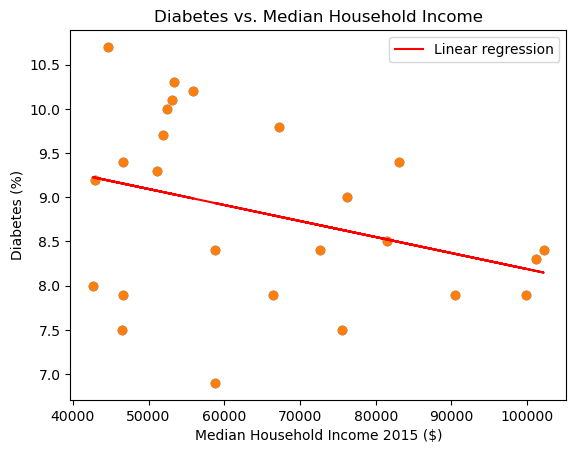

Linear Regression:  County
Fresno           9.154647
Kern             9.072370
Kings            9.157690
Madera           9.154919
Mariposa         9.191112
Merced           9.222197
San Joaquin      9.032680
Stanislaus       9.057896
Tulare           9.226581
Tuolumne         9.036394
Amador           8.986705
Calaveras        9.048440
El Dorado        8.629916
Placer           8.618540
Sacramento       8.934969
Yolo             8.934407
Alameda          8.523274
Contra Costa     8.494762
Marin            8.189854
Napa             8.682304
San Francisco    8.359064
San Mateo        8.166939
Santa Clara      8.147773
Solano           8.781591
Sonoma           8.794978
Name: MEDHHINC15, dtype: float64
Correlation coefficient:  -0.33657910836802485
The r-value is: 0.11328549618981461


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# Create a scatter plot comparing diabetes vs. median household income
plt.scatter(regions_desert['MEDHHINC15'], regions_desert['PCT_DIABETES_ADULTS13'])
plt.ylabel('Diabetes)')
plt.xlabel('Median Household Income 2015')
plt.title('Health vs. Socioeconomics')

# Create a scatter plot comparing health vs. socioeconomics
y = regions_desert['PCT_DIABETES_ADULTS13']
x = regions_desert['MEDHHINC15']
plt.scatter(x, y)
plt.ylabel('Diabetes (%)')
plt.xlabel('Median Household Income 2015 ($)')
plt.title('Diabetes vs. Median Household Income')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCT_DIABETES_ADULTS13'].corr(regions_desert['MEDHHINC15'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

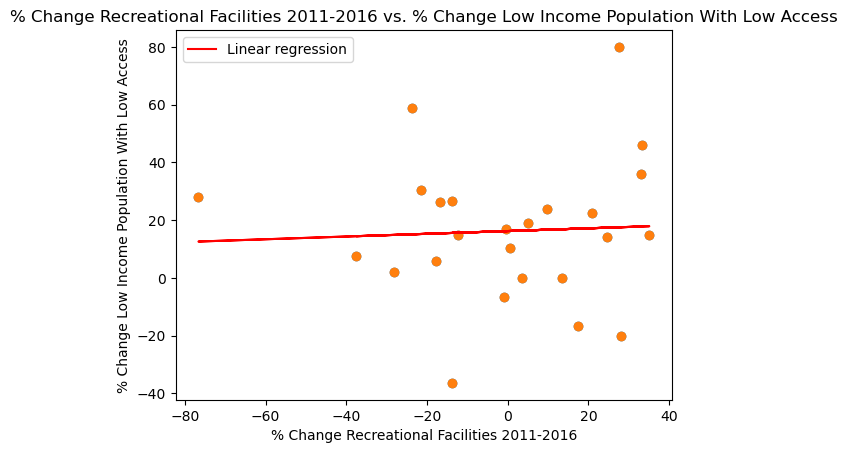

Linear Regression:  County
Fresno           15.109732
Kern             16.206467
Kings            15.579454
Madera           17.393987
Mariposa         16.396749
Merced           17.805590
San Joaquin      17.801154
Stanislaus       16.263224
Tulare           16.191209
Tuolumne         17.062288
Amador           16.865467
Calaveras        17.557678
El Dorado        17.532346
Placer           17.894195
Sacramento       17.218784
Yolo             15.388362
Alameda          14.453609
Contra Costa     16.696024
Marin            15.582314
Napa             15.649193
San Francisco    12.598981
San Mateo        14.890284
Santa Clara      15.207630
Solano           15.432367
Sonoma           16.468460
Name: PCH_LACCESS_LOWI_10_15, dtype: float64
Correlation coefficient:  0.0511421597039399
The r-value is: 0.002615520499183294


In [15]:
# Create a scatter plot comparing rec facilities vs. low income population
plt.scatter(regions_desert['PCH_LACCESS_LOWI_10_15'], regions_desert['PCH_RECFAC_11_16'])
plt.ylabel('% Change Low Income Population With Low Access')
plt.xlabel('% Change Recreational Facilities 2011-2016')
plt.title('% Change Recreational Facilities 2011-2016 vs. % Change Low Income Population With Low Access')

# Create a scatter plot comparing health vs. socioeconomics
y = regions_desert['PCH_RECFAC_11_16']
x = regions_desert['PCH_LACCESS_LOWI_10_15']
plt.scatter(x, y)
plt.ylabel('% Change Low Income Population With Low Access')
plt.xlabel('% Change Recreational Facilities 2011-2016')
plt.title('% Change Recreational Facilities 2011-2016 vs. % Change Low Income Population With Low Access')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCH_RECFAC_11_16'].corr(regions_desert['PCH_LACCESS_LOWI_10_15'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

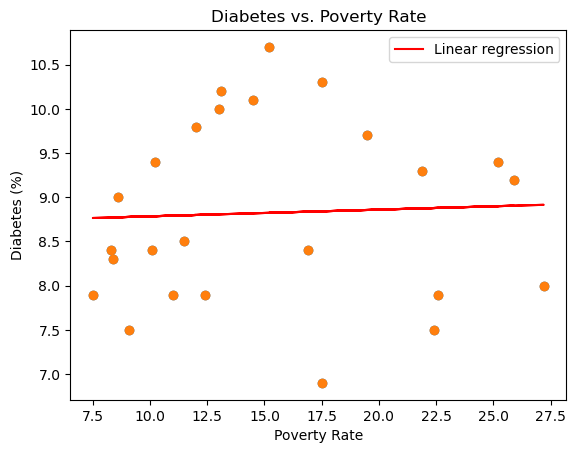

Linear Regression:  County
Fresno           8.899219
Kern             8.874247
Kings            8.878030
Madera           8.879544
Mariposa         8.823546
Merced           8.904516
San Joaquin      8.840951
Stanislaus       8.856085
Tulare           8.914353
Tuolumne         8.818249
Amador           8.807655
Calaveras        8.806898
El Dorado        8.777386
Placer           8.773602
Sacramento       8.836410
Yolo             8.840951
Alameda          8.795547
Contra Costa     8.785710
Marin            8.765278
Napa             8.784953
San Francisco    8.802358
San Mateo        8.772088
Santa Clara      8.771332
Solano           8.799331
Sonoma           8.791763
Name: POVRATE15, dtype: float64
Correlation coefficient:  0.04451119705981181


In [16]:
# Create a scatter plot comparing diabetes vs. median household income
plt.scatter(regions_desert['POVRATE15'], regions_desert['PCT_DIABETES_ADULTS13'])
plt.ylabel('Diabetes)')
plt.xlabel('Median Household Income 2015')
plt.title('Health vs. Poverty Rate')

# Create a scatter plot comparing health vs. socioeconomics
y = regions_desert['PCT_DIABETES_ADULTS13']
x = regions_desert['POVRATE15']
plt.scatter(x, y)
plt.ylabel('Diabetes (%)')
plt.xlabel('Poverty Rate')
plt.title('Diabetes vs. Poverty Rate')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCT_DIABETES_ADULTS13'].corr(regions_desert['POVRATE15'])


plt.legend()
plt.show()


print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)

In [17]:
#sacramento_desert
Access_regions_desert=regions_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]
Access_regions_desert
Access_regions_desert=Access_regions_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"%change '10-'15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"%change '10-'15 Low Income Pop w/Low Store Access"})
Access_regions_desert

Variable_Code  2010 Pop w/Low Store Access  2015 Pop w/Low Store Access  \
County                                                                    
Fresno                       113631.669300                 85484.374840   
Kern                         128065.381900                122097.200400   
Kings                         32733.481150                 29477.346620   
Madera                        29905.611360                 31476.851190   
Mariposa                       3155.777443                  3193.816861   
Merced                        36593.860630                 40077.481540   
San Joaquin                   77979.213900                 86687.301640   
Stanislaus                    68988.058470                 60419.586610   
Tulare                        63227.072640                 59680.269620   
Tuolumne                      15505.174690                 16108.129720   
Amador                         4760.406704                  5337.854488   
Calaveras                      3907.397164                  4578.261930   
El Dorado                     50565.681350                 52705.456070   
Placer                        53006.345890                 54218.689700   
Sacramento                   190245.961900                193704.687800   
Yolo                          18875.273320                 12376.451540   
Alameda                      160424.908700                107964.398400   
Contra Costa                 206021.837900                200374.382300   
Marin                         41395.852740                 30188.574690   
Napa                          19302.477620                 13839.775380   
San Francisco                 26692.376100                  4473.702112   
San Mateo                     82647.013480                 69488.547310   
Santa Clara                  170081.091300                132928.161100   
Solano                        92519.684070                 72338.645630   
Sonoma                        79444.089750                 74693.733840   

Variable_Code  %change '10-'15 Pop w/Low Store Access  \
County                                                  
Fresno                                     -24.770642   
Kern                                        -4.660261   
Kings                                       -9.947413   
Madera                                       5.253997   
Mariposa                                     1.205390   
Merced                                       9.519687   
San Joaquin                                 11.167191   
Stanislaus                                 -12.420225   
Tulare                                      -5.609627   
Tuolumne                                     3.888734   
Amador                                      12.130220   
Calaveras                                   17.169096   
El Dorado                                    4.231674   
Placer                                       2.287167   
Sacramento                                   1.818029   
Yolo                                       -34.430345   
Alameda                                    -32.700976   
Contra Costa                                -2.741193   
Marin                                      -27.073432   
Napa                                       -28.300524   
San Francisco                              -83.239776   
San Mateo                                  -15.921285   
Santa Clara                                -21.844245   
Solano                                     -21.812697   
Sonoma                                      -5.979496   

Variable_Code  2010 Low Income Pop w/Low Store Access  \
County                                                  
Fresno                                   50728.913560   
Kern                                     45375.139070   
Kings                                     8628.900451   
Madera                                   11364.843840   
Mariposa                                  1080.509743   
Merced                             

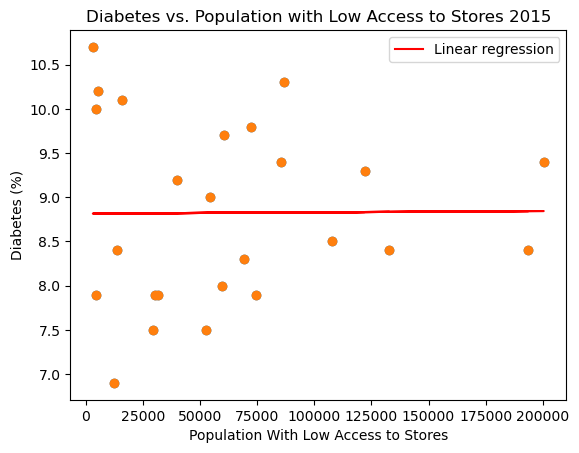

Linear Regression:  County
Fresno           8.827306
Kern             8.832586
Kings            8.819230
Madera           8.819518
Mariposa         8.815440
Merced           8.820759
San Joaquin      8.827480
Stanislaus       8.823692
Tulare           8.823585
Tuolumne         8.817302
Amador           8.815749
Calaveras        8.815640
El Dorado        8.822579
Placer           8.822798
Sacramento       8.842912
Yolo             8.816764
Alameda          8.830548
Contra Costa     8.843873
Marin            8.819333
Napa             8.816975
San Francisco    8.815624
San Mateo        8.825000
Santa Clara      8.834148
Solano           8.825411
Sonoma           8.825750
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.007674416709386703


In [18]:
# Create a scatter plot comparing diabetes vs. low access
plt.scatter(regions_desert['LACCESS_POP15'], regions_desert['PCT_DIABETES_ADULTS13'])
plt.ylabel('Diabetes)')
plt.xlabel('Population With Low Access to Store')
plt.title('Health vs. Population with Low Access to Stores')

# Create a scatter plot comparing health vs. socioeconomics
y = regions_desert['PCT_DIABETES_ADULTS13']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('Diabetes (%)')
plt.xlabel('Population With Low Access to Stores')
plt.title('Diabetes vs. Population with Low Access to Stores 2015')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCT_DIABETES_ADULTS13'].corr(regions_desert['LACCESS_POP15'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)

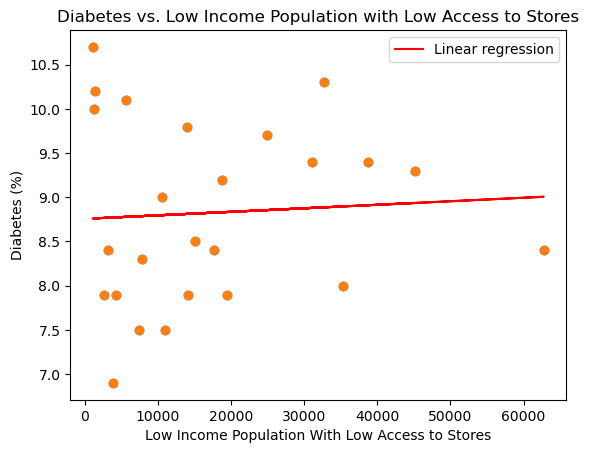

Linear Regression:  County
Fresno           8.909713
Kern             8.935241
Kings            8.785134
Madera           8.811854
Mariposa         8.759951
Merced           8.830188
San Joaquin      8.885659
Stanislaus       8.854984
Tulare           8.896147
Tuolumne         8.778015
Amador           8.760915
Calaveras        8.760485
El Dorado        8.799170
Placer           8.797469
Sacramento       9.005377
Yolo             8.770921
Alameda          8.815794
Contra Costa     8.879508
Marin            8.772645
Napa             8.768103
San Francisco    8.765822
San Mateo        8.786964
Santa Clara      8.825922
Solano           8.811175
Sonoma           8.832848
Name: LACCESS_LOWI15, dtype: float64
Correlation coefficient:  0.06141010605896574
The r-value is: 0.00377120112617342


In [19]:
# Create a scatter plot comparing diabetes vs. low income population
plt.scatter(regions_desert['LACCESS_LOWI15'], regions_desert['PCT_DIABETES_ADULTS13'])
plt.ylabel('Diabetes)')
plt.xlabel('Low Income Population With Low Access to Store')
plt.title('Health vs. Low Income Population with Low Access to Stores')

# Create a scatter plot comparing health vs. socioeconomics
y = regions_desert['PCT_DIABETES_ADULTS13']
x = regions_desert['LACCESS_LOWI15']
plt.scatter(x, y)
plt.ylabel('Diabetes (%)')
plt.xlabel('Low Income Population With Low Access to Stores')
plt.title('Diabetes vs. Low Income Population with Low Access to Stores')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCT_DIABETES_ADULTS13'].corr(regions_desert['LACCESS_LOWI15'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

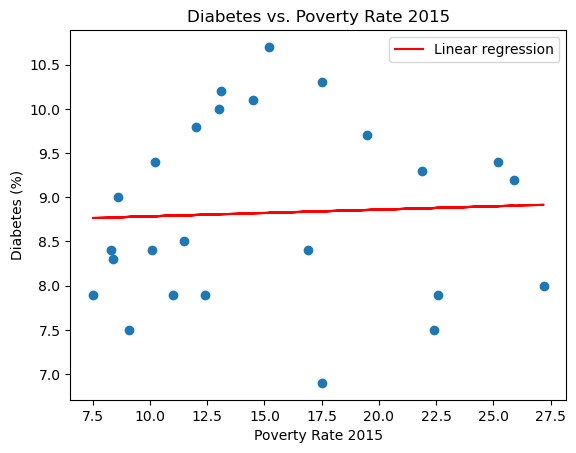

Linear Regression:  County
Fresno           8.899219
Kern             8.874247
Kings            8.878030
Madera           8.879544
Mariposa         8.823546
Merced           8.904516
San Joaquin      8.840951
Stanislaus       8.856085
Tulare           8.914353
Tuolumne         8.818249
Amador           8.807655
Calaveras        8.806898
El Dorado        8.777386
Placer           8.773602
Sacramento       8.836410
Yolo             8.840951
Alameda          8.795547
Contra Costa     8.785710
Marin            8.765278
Napa             8.784953
San Francisco    8.802358
San Mateo        8.772088
Santa Clara      8.771332
Solano           8.799331
Sonoma           8.791763
Name: POVRATE15, dtype: float64
Correlation coefficient:  0.04451119705981181
The r-value is: 0.001981246663697399


In [20]:
# Create a scatter plot comparing diabetes vs. poverty rate
y = regions_desert['PCT_DIABETES_ADULTS13']
x = regions_desert['POVRATE15']
plt.scatter(x, y)
plt.ylabel('Diabetes (%)')
plt.xlabel('Poverty Rate 2015')
plt.title('Diabetes vs. Poverty Rate 2015')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['PCT_DIABETES_ADULTS13'].corr(regions_desert['POVRATE15'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

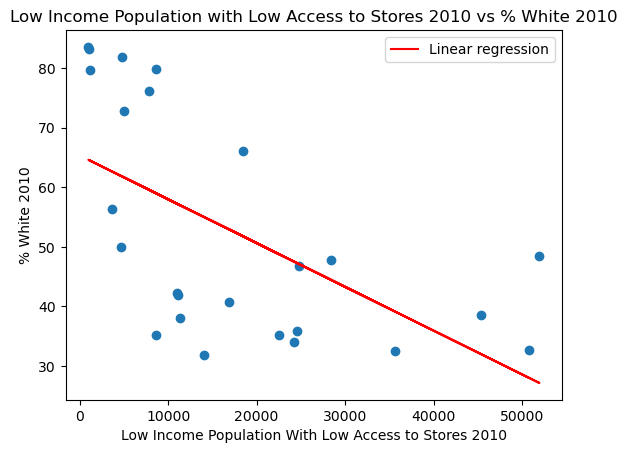

Linear Regression:  County
Fresno           28.049379
Kern             31.982775
Kings            58.980082
Madera           56.969996
Mariposa         64.525853
Merced           54.974882
San Joaquin      47.279391
Stanislaus       47.087387
Tulare           39.148692
Tuolumne         61.784913
Amador           64.438136
Calaveras        64.600729
El Dorado        58.997379
Placer           59.587036
Sacramento       27.165242
Yolo             61.858801
Alameda          47.520454
Contra Costa     44.482760
Marin            61.654214
Napa             62.668448
San Francisco    57.171661
San Mateo        57.224104
Santa Clara      48.748072
Solano           52.965205
Sonoma           51.728702
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  -0.5872819828431428
The r-value is: 0.3449001273721735


In [21]:
# Create a scatter plot comparing low income low access vs. white demographic
y = regions_desert['PCT_NHWHITE10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% White 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % White 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_NHWHITE10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

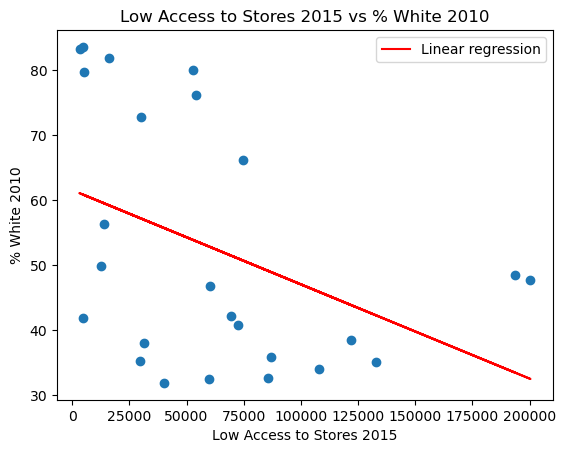

Linear Regression:  County
Fresno           49.143770
Kern             43.842149
Kings            57.253716
Madera           56.964183
Mariposa         61.059631
Merced           55.718792
San Joaquin      48.969583
Stanislaus       52.773208
Tulare           52.880263
Tuolumne         59.189609
Amador           60.749169
Calaveras        60.859160
El Dorado        53.890232
Placer           53.671113
Sacramento       33.473221
Yolo             59.729964
Alameda          45.888611
Contra Costa     32.507434
Marin            57.150728
Napa             59.518072
San Francisco    60.874300
San Mateo        51.460002
Santa Clara      42.273801
Solano           51.047301
Sonoma           50.706279
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  -0.4182239207195212
The r-value is: 0.17491124786200835


In [22]:
# Create a scatter plot comparing low access 2015 vs. white demographic
y = regions_desert['PCT_NHWHITE10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% White 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % White 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_NHWHITE10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

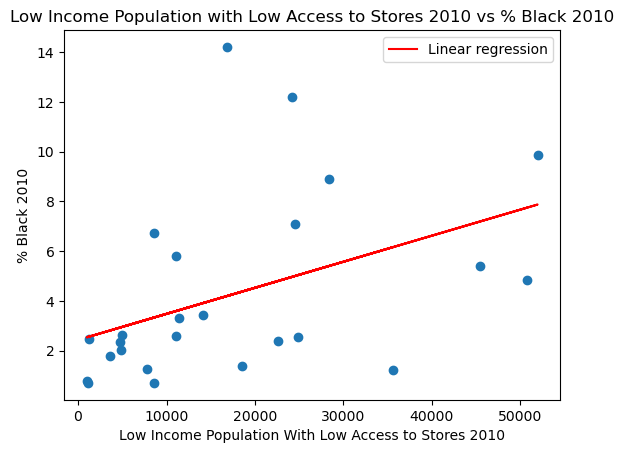

Linear Regression:  County
Fresno           7.750259
Kern             7.189319
Kings            3.339245
Madera           3.625902
Mariposa         2.548365
Merced           3.910425
San Joaquin      5.007875
Stanislaus       5.035257
Tulare           6.167391
Tuolumne         2.939249
Amador           2.560874
Calaveras        2.537687
El Dorado        3.336778
Placer           3.252688
Sacramento       7.876345
Yolo             2.928712
Alameda          4.973497
Contra Costa     5.406702
Marin            2.957888
Napa             2.813249
San Francisco    3.597143
San Mateo        3.589664
Santa Clara      4.798427
Solano           4.197024
Sonoma           4.373361
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  0.4310310931635774
The r-value is: 0.18578780327378855


In [23]:
# Create a scatter plot comparing low income low access vs. black demographic
y = regions_desert['PCT_NHBLACK10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Black 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Black 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_NHBLACK10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

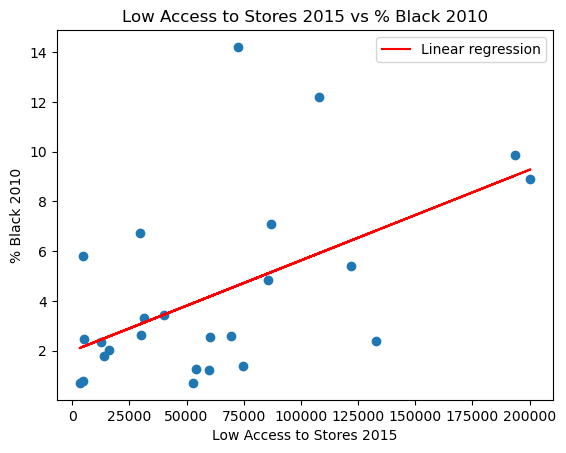

Linear Regression:  County
Fresno           5.103810
Kern             6.437642
Kings            3.063434
Madera           3.136277
Mariposa         2.105906
Merced           3.449605
San Joaquin      5.147634
Stanislaus       4.190682
Tulare           4.163748
Tuolumne         2.576384
Amador           2.184015
Calaveras        2.156342
El Dorado        3.909651
Placer           3.964779
Sacramento       9.046354
Yolo             2.440436
Alameda          5.922774
Contra Costa     9.289336
Marin            3.089345
Napa             2.493746
San Francisco    2.152533
San Mateo        4.521071
Santa Clara      6.832222
Solano           4.624902
Sonoma           4.710700
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.5415199611343238
The r-value is: 0.2932438683069195


In [24]:
# Create a scatter plot comparing low access 2015 vs. black demographic
y = regions_desert['PCT_NHBLACK10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Black 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Black 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_NHBLACK10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

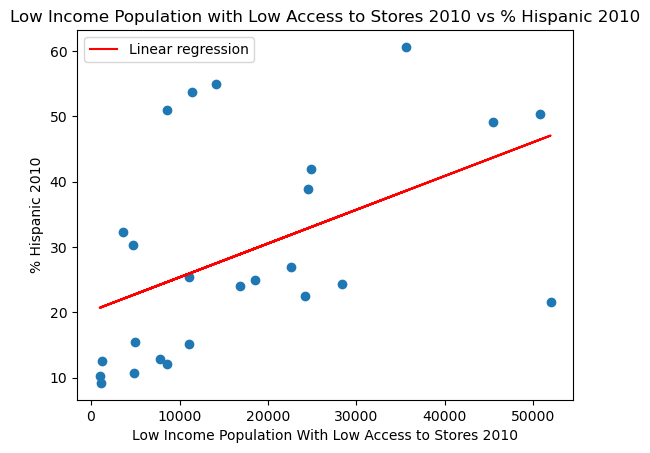

Linear Regression:  County
Fresno           46.431000
Kern             43.660520
Kings            24.645010
Madera           26.060811
Mariposa         20.738855
Merced           27.466066
San Joaquin      32.886372
Stanislaus       33.021610
Tulare           38.613218
Tuolumne         22.669431
Amador           20.800638
Calaveras        20.686116
El Dorado        24.632826
Placer           24.217503
Sacramento       47.053741
Yolo             22.617388
Alameda          32.716580
Contra Costa     34.856175
Marin            22.761489
Napa             22.047115
San Francisco    25.918768
San Mateo        25.881830
Santa Clara      31.851909
Solano           28.881578
Sonoma           29.752507
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  0.48408860522612396
The r-value is: 0.2343417777097741


In [25]:
# Create a scatter plot comparing low income low access vs. hispanic demographic
y = regions_desert['PCT_HISP10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Hispanic 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Hispanic 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_HISP10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

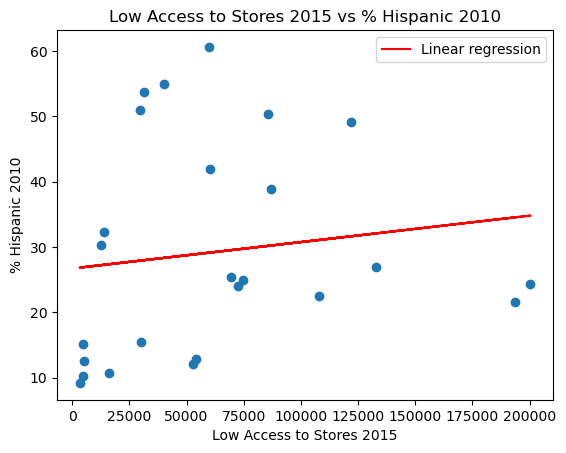

Linear Regression:  County
Fresno           30.161610
Kern             31.641669
Kings            27.897549
Madera           27.978378
Mariposa         26.835048
Merced           28.326055
San Joaquin      30.210238
Stanislaus       29.148376
Tulare           29.118490
Tuolumne         27.357104
Amador           26.921720
Calaveras        26.891014
El Dorado        28.836536
Placer           28.897708
Sacramento       34.536373
Yolo             27.206252
Alameda          31.070356
Contra Costa     34.805992
Marin            27.926300
Napa             27.265407
San Francisco    26.886787
San Mateo        29.514986
Santa Clara      32.079506
Solano           29.630200
Sonoma           29.725403
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.1366374593102201
The r-value is: 0.01866979528675205


In [26]:
# Create a scatter plot comparing low access 2015 vs. hispanic demographic
y = regions_desert['PCT_HISP10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Hispanic 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Hispanic 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_HISP10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

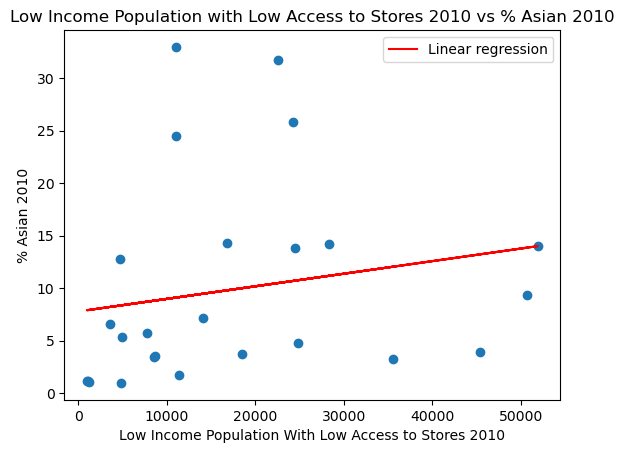

Linear Regression:  County
Fresno           13.856262
Kern             13.213881
Kings             8.804829
Madera            9.133105
Mariposa          7.899124
Merced            9.458936
San Joaquin      10.715721
Stanislaus       10.747078
Tulare           12.043583
Tuolumne          8.346759
Amador            7.913449
Calaveras         7.886895
El Dorado         8.802004
Placer            8.705704
Sacramento       14.000654
Yolo              8.334692
Alameda          10.676352
Contra Costa     11.172452
Marin             8.368104
Napa              8.202465
San Francisco     9.100170
San Mateo         9.091605
Santa Clara      10.475864
Solano            9.787145
Sonoma            9.989084
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  0.18976292970210887
The r-value is: 0.03600996948912752


In [27]:
# Create a scatter plot comparing low income low access vs. asian demographic
y = regions_desert['PCT_NHASIAN10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Asian 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Asian 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_NHASIAN10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

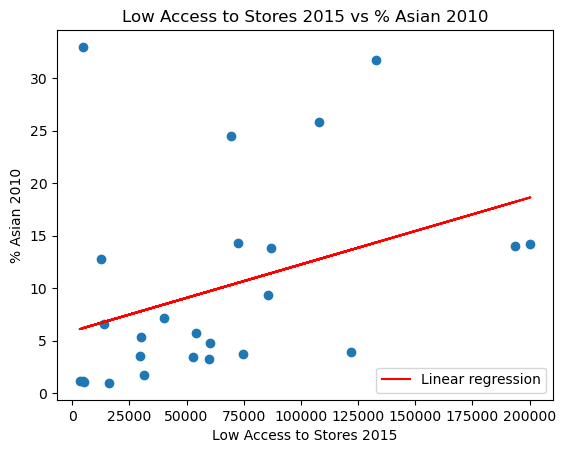

Linear Regression:  County
Fresno           11.330056
Kern             13.663117
Kings             7.761147
Madera            7.888560
Mariposa          6.086294
Merced            8.436614
San Joaquin      11.406709
Stanislaus        9.732864
Tulare            9.685753
Tuolumne          6.909227
Amador            6.222918
Calaveras         6.174514
El Dorado         9.241300
Placer            9.337727
Sacramento       18.226127
Yolo              6.671435
Alameda          12.762539
Contra Costa     18.651136
Marin             7.806468
Napa              6.764681
San Francisco     6.167852
San Mateo        10.310761
Santa Clara      14.353293
Solano           10.492377
Sonoma           10.642449
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.36413820336422525
The r-value is: 0.1325966311493259


In [28]:
# Create a scatter plot comparing low access 2015 vs. asian demographic
y = regions_desert['PCT_NHASIAN10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Asian 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Asian 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_NHASIAN10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

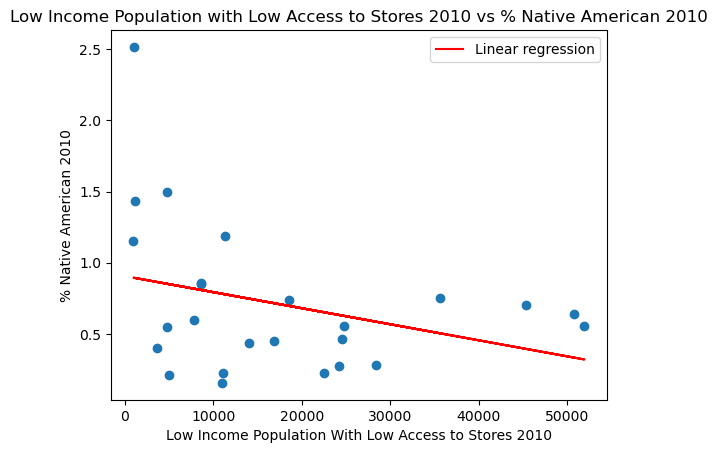

Linear Regression:  County
Fresno           0.334688
Kern             0.394998
Kings            0.808941
Madera           0.778121
Mariposa         0.893973
Merced           0.747530
San Joaquin      0.629537
Stanislaus       0.626593
Tulare           0.504871
Tuolumne         0.851947
Amador           0.892628
Calaveras        0.895121
El Dorado        0.809206
Placer           0.818247
Sacramento       0.321132
Yolo             0.853079
Alameda          0.633233
Contra Costa     0.586657
Marin            0.849943
Napa             0.865494
San Francisco    0.781213
San Mateo        0.782017
Santa Clara      0.652056
Solano           0.716716
Sonoma           0.697757
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  -0.32547015447119876
The r-value is: 0.10593082145150602


In [29]:
# Create a scatter plot comparing low income low access vs. native american demographic
y = regions_desert['PCT_NHNA10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Native American 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Native American 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_NHNA10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

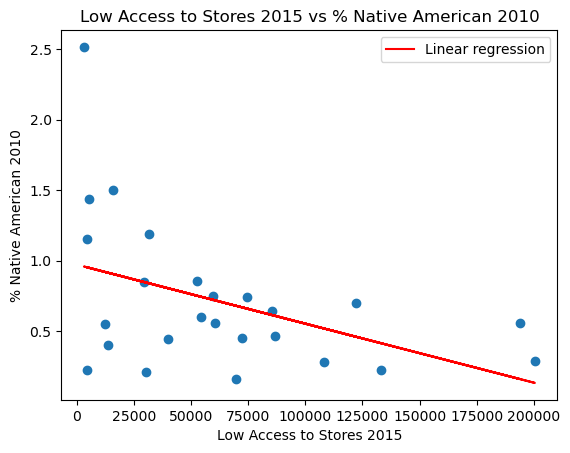

Linear Regression:  County
Fresno           0.613023
Kern             0.459715
Kings            0.847540
Madera           0.839167
Mariposa         0.957596
Merced           0.803154
San Joaquin      0.607986
Stanislaus       0.717976
Tulare           0.721072
Tuolumne         0.903520
Amador           0.948618
Calaveras        0.951799
El Dorado        0.750277
Placer           0.743941
Sacramento       0.159874
Yolo             0.919146
Alameda          0.518893
Contra Costa     0.131946
Marin            0.844562
Napa             0.913019
San Francisco    0.952237
San Mateo        0.680002
Santa Clara      0.414362
Solano           0.668068
Sonoma           0.658206
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  -0.43712933190433423
The r-value is: 0.19108205281112958


In [30]:
# Create a scatter plot comparing low access 2015 vs. native american demographic
y = regions_desert['PCT_NHNA10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Native American 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Native American 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_NHNA10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

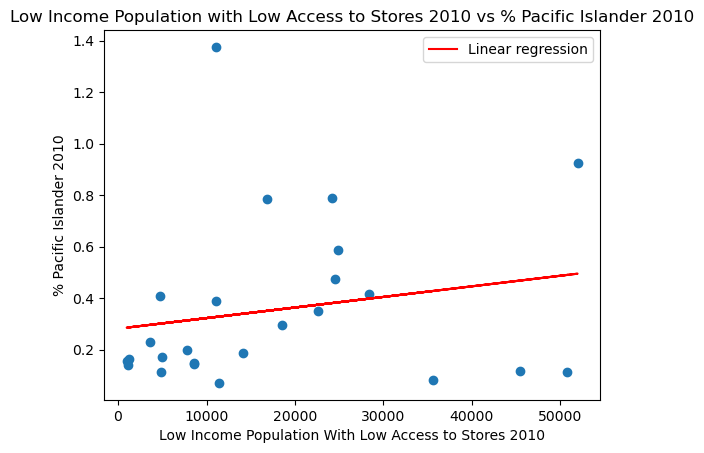

Linear Regression:  County
Fresno           0.490219
Kern             0.468199
Kings            0.317067
Madera           0.328320
Mariposa         0.286022
Merced           0.339489
San Joaquin      0.382568
Stanislaus       0.383643
Tulare           0.428084
Tuolumne         0.301366
Amador           0.286513
Calaveras        0.285603
El Dorado        0.316971
Placer           0.313670
Sacramento       0.495168
Yolo             0.300952
Alameda          0.381219
Contra Costa     0.398224
Marin            0.302098
Napa             0.296420
San Francisco    0.327191
San Mateo        0.326897
Santa Clara      0.374347
Solano           0.350739
Sonoma           0.357661
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  0.1956978229550304
The r-value is: 0.038297637909338426


In [31]:
# Create a scatter plot comparing low income low access vs. pacific islander demographic
y = regions_desert['PCT_NHPI10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Pacific Islander 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Pacific Islander 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_NHPI10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

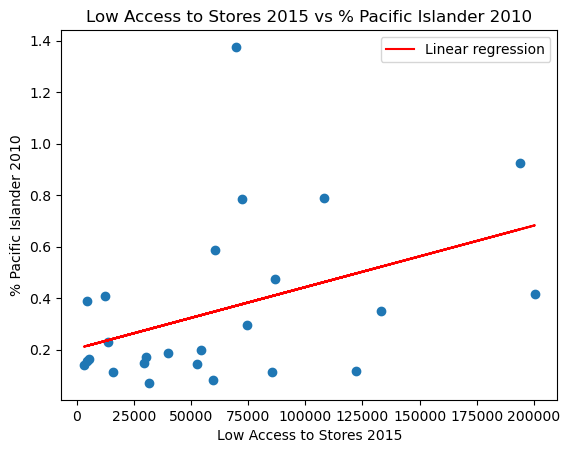

Linear Regression:  County
Fresno           0.408349
Kern             0.495863
Kings            0.274478
Madera           0.279258
Mariposa         0.211654
Merced           0.299815
San Joaquin      0.411225
Stanislaus       0.348438
Tulare           0.346671
Tuolumne         0.242523
Amador           0.216779
Calaveras        0.214963
El Dorado        0.329999
Placer           0.333616
Sacramento       0.667023
Yolo             0.233603
Alameda          0.462082
Contra Costa     0.682965
Marin            0.276178
Napa             0.237101
San Francisco    0.214713
San Mateo        0.370115
Santa Clara      0.521752
Solano           0.376928
Sonoma           0.382557
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.4109423191078472
The r-value is: 0.1688735896337357


In [32]:
# Create a scatter plot comparing low access 2015 vs. pacific islander demographic
y = regions_desert['PCT_NHPI10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Pacific Islander 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Pacific Islander 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_NHPI10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

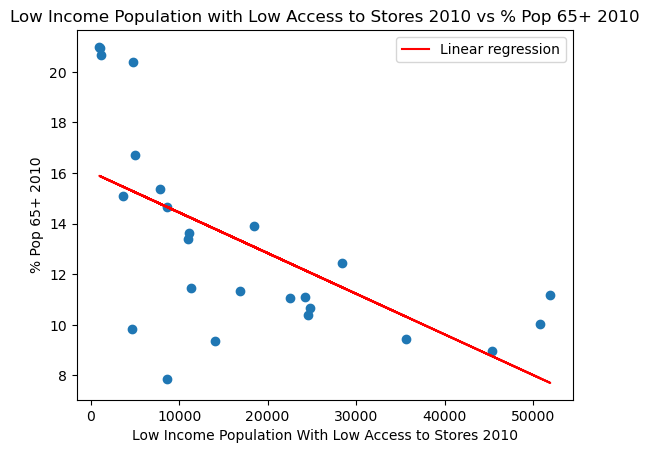

Linear Regression:  County
Fresno            7.897430
Kern              8.757494
Kings            14.660647
Madera           14.221127
Mariposa         15.873269
Merced           13.784882
San Joaquin      12.102208
Stanislaus       12.060225
Tulare           10.324373
Tuolumne         15.273943
Amador           15.854089
Calaveras        15.889641
El Dorado        14.664429
Placer           14.793362
Sacramento        7.704107
Yolo             15.290099
Alameda          12.154918
Contra Costa     11.490705
Marin            15.245365
Napa             15.467134
San Francisco    14.265223
San Mateo        14.276690
Santa Clara      12.423346
Solano           13.345452
Sonoma           13.075081
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  -0.6125274301052418
The r-value is: 0.37518985263133187


In [33]:
# Create a scatter plot comparing low income low access vs. pop 65+ demographic
y = regions_desert['PCT_65OLDER10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% Pop 65+ 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % Pop 65+ 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_65OLDER10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

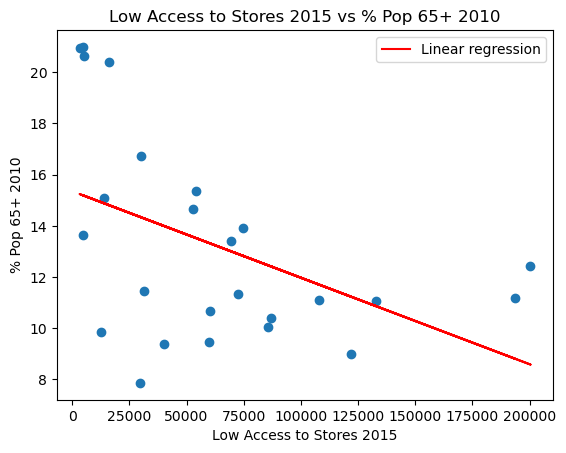

Linear Regression:  County
Fresno           12.461399
Kern             11.224765
Kings            14.353093
Madera           14.285557
Mariposa         15.240845
Merced           13.995062
San Joaquin      12.420769
Stanislaus       13.307988
Tulare           13.332959
Tuolumne         14.804651
Amador           15.168428
Calaveras        15.194084
El Dorado        13.568540
Placer           13.517429
Sacramento        8.806151
Yolo             14.930692
Alameda          11.702114
Contra Costa      8.580875
Marin            14.329070
Napa             14.881267
San Francisco    15.197616
San Mateo        13.001674
Santa Clara      10.858938
Solano           12.905410
Sonoma           12.825864
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  -0.46532555633010264
The r-value is: 0.21652787337391957


In [34]:
# Create a scatter plot comparing low access 2015 vs. pop 65+ demographic
y = regions_desert['PCT_65OLDER10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% Pop 65+ 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % Pop 65+ 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_65OLDER10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

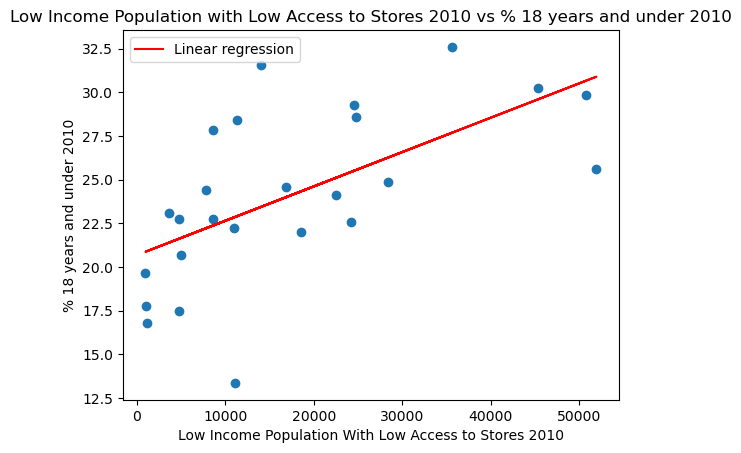

Linear Regression:  County
Fresno           30.652822
Kern             29.599504
Kings            22.369935
Madera           22.908213
Mariposa         20.884842
Merced           23.442482
San Joaquin      25.503246
Stanislaus       25.554662
Tulare           27.680554
Tuolumne         21.618834
Amador           20.908331
Calaveras        20.864791
El Dorado        22.365303
Placer           22.207400
Sacramento       30.889584
Yolo             21.599047
Alameda          25.438692
Contra Costa     26.252151
Marin            21.653833
Napa             21.382233
San Francisco    22.854210
San Mateo        22.840166
Santa Clara      25.109950
Solano           23.980650
Sonoma           24.311771
Name: LACCESS_LOWI10, dtype: float64
Correlation coefficient:  0.6085625952025331
The r-value is: 0.37034843227964226


In [35]:
# Create a scatter plot comparing low income low access vs. 18 years and under demographic
y = regions_desert['PCT_18YOUNGER10']
x = regions_desert['LACCESS_LOWI10']
plt.scatter(x, y)
plt.ylabel('% 18 years and under 2010')
plt.xlabel('Low Income Population With Low Access to Stores 2010')
plt.title('Low Income Population with Low Access to Stores 2010 vs % 18 years and under 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_LOWI10'].corr(regions_desert['PCT_18YOUNGER10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

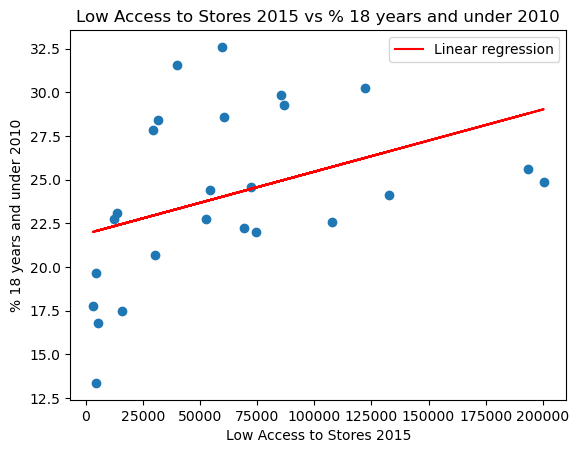

Linear Regression:  County
Fresno           24.932067
Kern             26.236934
Kings            22.935998
Madera           23.007260
Mariposa         21.999263
Merced           23.313783
San Joaquin      24.974939
Stanislaus       24.038768
Tulare           24.012419
Tuolumne         22.459525
Amador           22.075676
Calaveras        22.048605
El Dorado        23.763839
Placer           23.817770
Sacramento       28.788997
Yolo             22.326529
Alameda          25.733246
Contra Costa     29.026702
Marin            22.961346
Napa             22.378681
San Francisco    22.044878
San Mateo        24.361982
Santa Clara      26.622945
Solano           24.463558
Sonoma           24.547493
Name: LACCESS_POP15, dtype: float64
Correlation coefficient:  0.3983208888423967
The r-value is: 0.1586595304881969


In [36]:
# Create a scatter plot comparing low access 2015 vs. pop 65+ demographic
y = regions_desert['PCT_18YOUNGER10']
x = regions_desert['LACCESS_POP15']
plt.scatter(x, y)
plt.ylabel('% 18 years and under 2010')
plt.xlabel('Low Access to Stores 2015')
plt.title('Low Access to Stores 2015 vs % 18 years and under 2010')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

corr = regions_desert['LACCESS_POP15'].corr(regions_desert['PCT_18YOUNGER10'])



plt.legend()
plt.show()

print('Linear Regression: ', line)
print('Correlation coefficient: ', corr)
print(f"The r-value is: {r_value**2}")

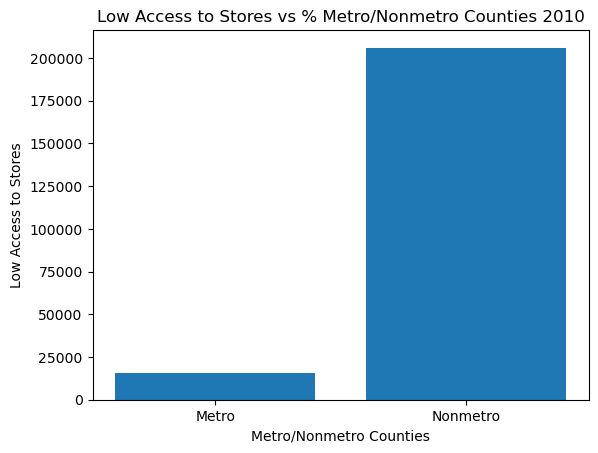

In [51]:
# Create a bar graph comparing low access 2015 vs.metro/nonmetro counties
x = regions_desert['METRO13']
y = regions_desert['LACCESS_POP10']
plt.bar(x, y)
plt.xlabel('Metro/Nonmetro Counties')
plt.xticks([0, 1], ['Metro', 'Nonmetro'])
plt.ylabel('Low Access to Stores')
plt.title('Low Access to Stores vs % Metro/Nonmetro Counties 2010')

plt.savefig('access_metro_nonmetro_2010', dpi=300, bbox_inches='tight')

plt.show()



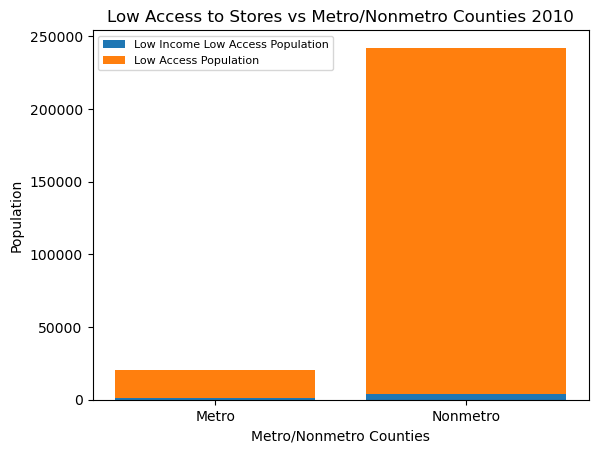

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
x = regions_desert['METRO13']
y1 = regions_desert['LACCESS_LOWI10']
y2 = regions_desert['LACCESS_POP10']





plt.bar(x, y1, label='Low Income Low Access Population')
plt.bar(x, y2, bottom=y1, label='Low Access Population')

plt.xlabel('Metro/Nonmetro Counties')
plt.xticks([0, 1], ['Metro', 'Nonmetro'])
plt.ylabel('Population')
plt.title('Low Access to Stores vs Metro/Nonmetro Counties 2010')

plt.legend(loc='upper left')
plt.legend(fontsize=8)
plt.savefig('access_metro_nonmetro_2010', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Create a bar graph comparing low access 2015 vs.metro/nonmetro counties
x = regions_desert['METRO13']
y = regions_desert['LACCESS_LOWI10']
plt.bar(x, y)
plt.xlabel('Metro/Nonmetro Counties')
plt.xticks([0, 1], ['Metro', 'Nonmetro'])
plt.ylabel('Low Access to Stores')
plt.title('Low Access to Stores vs % Metro/Nonmetro Counties 2010')

plt.savefig('access_metro_nonmetro_2010', dpi=300, bbox_inches='tight')

plt.show()

In [38]:
access_df = pd.DataFrame(Access_regions_desert)
access_df.to_csv('access_df.csv', index_label="County")
access_df

Variable_Code  2010 Pop w/Low Store Access  2015 Pop w/Low Store Access  \
County                                                                    
Fresno                       113631.669300                 85484.374840   
Kern                         128065.381900                122097.200400   
Kings                         32733.481150                 29477.346620   
Madera                        29905.611360                 31476.851190   
Mariposa                       3155.777443                  3193.816861   
Merced                        36593.860630                 40077.481540   
San Joaquin                   77979.213900                 86687.301640   
Stanislaus                    68988.058470                 60419.586610   
Tulare                        63227.072640                 59680.269620   
Tuolumne                      15505.174690                 16108.129720   
Amador                         4760.406704                  5337.854488   
Calaveras                      3907.397164                  4578.261930   
El Dorado                     50565.681350                 52705.456070   
Placer                        53006.345890                 54218.689700   
Sacramento                   190245.961900                193704.687800   
Yolo                          18875.273320                 12376.451540   
Alameda                      160424.908700                107964.398400   
Contra Costa                 206021.837900                200374.382300   
Marin                         41395.852740                 30188.574690   
Napa                          19302.477620                 13839.775380   
San Francisco                 26692.376100                  4473.702112   
San Mateo                     82647.013480                 69488.547310   
Santa Clara                  170081.091300                132928.161100   
Solano                        92519.684070                 72338.645630   
Sonoma                        79444.089750                 74693.733840   

Variable_Code  %change '10-'15 Pop w/Low Store Access  \
County                                                  
Fresno                                     -24.770642   
Kern                                        -4.660261   
Kings                                       -9.947413   
Madera                                       5.253997   
Mariposa                                     1.205390   
Merced                                       9.519687   
San Joaquin                                 11.167191   
Stanislaus                                 -12.420225   
Tulare                                      -5.609627   
Tuolumne                                     3.888734   
Amador                                      12.130220   
Calaveras                                   17.169096   
El Dorado                                    4.231674   
Placer                                       2.287167   
Sacramento                                   1.818029   
Yolo                                       -34.430345   
Alameda                                    -32.700976   
Contra Costa                                -2.741193   
Marin                                      -27.073432   
Napa                                       -28.300524   
San Francisco                              -83.239776   
San Mateo                                  -15.921285   
Santa Clara                                -21.844245   
Solano                                     -21.812697   
Sonoma                                      -5.979496   

Variable_Code  2010 Low Income Pop w/Low Store Access  \
County                                                  
Fresno                                   50728.913560   
Kern                                     45375.139070   
Kings                                     8628.900451   
Madera                                   11364.843840   
Mariposa                                  1080.509743   
Merced                             

In [39]:
socioeconomics_df = pd.DataFrame(socioeconomics_data)
socioeconomics_df.to_csv('socioeconomics_df.csv', index_label="County")
socioeconomics_df

Variable_Code  % White 2010  % Black 2010  % Hispanic 2010  % Asian 2010  \
County                                                                     
Fresno            32.728465      4.836907        50.305766      9.334838   
Kern              38.563845      5.404398        49.192205      3.942208   
Kings             35.219176      6.741970        50.898799      3.489953   
Madera            38.034004      3.320187        53.685083      1.678985   
Mariposa          83.239275      0.706811         9.183058      1.101310   
Merced            31.900404      3.434418        54.921362      7.108482   
San Joaquin       35.884554      7.082967        38.864536     13.796319   
Stanislaus        46.733715      2.539591        41.919864      4.803549   
Tulare            32.551297      1.243162        60.623639      3.212274   
Tuolumne          81.865800      2.012102        10.689063      0.957283   
Amador            79.611982      2.462524        12.485889      1.039616   
Calaveras         83.535916      0.778885        10.318575      1.160648   
El Dorado         79.913067      0.715793        12.081764      3.392835   
Placer            76.139390      1.270549        12.831772      5.729382   
Sacramento        48.433311      9.863982        21.581519     14.022109   
Yolo              49.908140      2.365957        30.347674     12.765809   
Alameda           34.070640     12.191587        22.505166     25.857876   
Contra Costa      47.751293      8.922952        24.361669     14.192321   
Marin             72.830208      2.623124        15.478450      5.378968   
Napa              56.392691      1.787755        32.245538      6.583922   
San Francisco     41.907145      5.809608        15.122790     32.996579   
San Mateo         42.258832      2.611591        25.402150     24.487961   
Santa Clara       35.187148      2.375954        26.897098     31.738475   
Solano            40.796044     14.211649        24.037122     14.280357   
Sonoma            66.137952      1.398906        24.888505      3.673860   

Variable_Code  % Native American 2010  % Pacific Islander 2010  \
County                                                           
Fresno                       0.642592                 0.114568   
Kern                         0.701856                 0.118504   
Kings                        0.847812                 0.149037   
Madera                       1.186491                 0.070924   
Mariposa                     2.514931                 0.142458   
Merced                       0.440200                 0.186088   
San Joaquin                  0.463880                 0.473949   
Stanislaus                   0.557874                 0.586254   
Tulare                       0.751506                 0.083677   
Tuolumne                     1.499142                 0.111984   
Amador                       1.436035                 0.165393   
Calaveras                    1.154066                 0.155777   
El Dorado                    0.857736                 0.144153   
Placer                       0.596960                 0.200039   
Sacramento                   0.555051                 0.923253   
Yolo                         0.546679                 0.406773   
Alameda                      0.277367                 0.789991   
Contra Costa                 0.284455                 0.417721   
Marin                        0.210373                 0.172736   
Napa                         0.398582                 0.229331   
San Francisco                0.227014                 0.388458   
San Mateo                    0.156587                 1.375738   
Santa Clara                  0.226869                 0.350912   
Solano                       0.450956                 0.784577   
Sonoma                       0.740683                 0.296356   

Variable_Code  % Pop 65+ Years 2010  % Pop under 18 years 2010  \
County                                                           
Fresno                    10.040

In [40]:
import matplotlib.patches as mpatches

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (6).

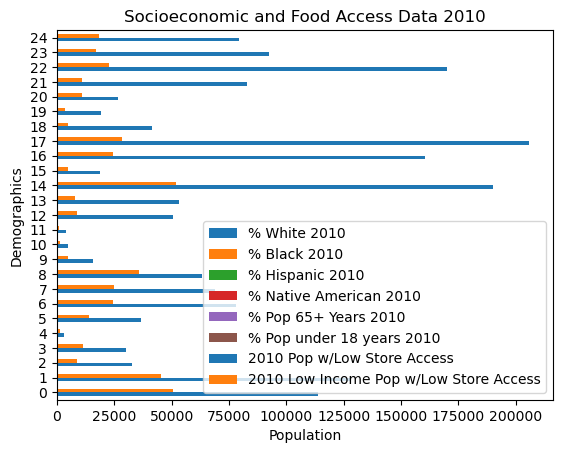

In [41]:

# Load data from CSV files
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Create stacked bar chart
socioeconomics_df[["% White 2010", "% Black 2010", "% Hispanic 2010", "% Native American 2010", "% Pop 65+ Years 2010", "% Pop under 18 years 2010"]].plot(kind='barh')
access_df[['2010 Pop w/Low Store Access', '2010 Low Income Pop w/Low Store Access']].plot(kind='barh', ax=plt.gca())

# Add title and labels to chart
plt.title("Socioeconomic and Food Access Data 2010")
plt.xlabel("Population")
plt.ylabel("Demographics")


plt.gca().set_yticklabels(["% White", "% Black", "% Hispanic", "% Native American", "% Pop 65+ Years", "% Pop under 18 years"])
plt.legend(['Low Access', 'Low Income Low Access'])


plt.savefig('stacked_bar_socioeconomics_and_food_access_data_2010', dpi=300, bbox_inches='tight')
# Show chart
plt.show()

In [ ]:
#merged_df = pd.merge(access_df, socioeconomics_df, on='index')
#merged_df.head()
socioeconomics_df.head()

In [ ]:
import matplotlib.pyplot as plt
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')
x = access_df['2010 Pop w/Low Store Access']
y = socioeconomics_df[["% White 2010", "% Black 2010", "% Hispanic 2010", "% Asian 2010", "% Native American 2010", "% Pacific Islander 2010", "% Pop 65+ Years 2010", "% Pop under 18 years 2010"]]

plt.figure()
for column in y.columns:
    plt.plot(x,y[column], label=column)
plt.legend()
plt.xlabel('Low Access to Food Banks')
plt.ylabel('Demographics')
plt.title('Low Access to Food Banks vs. Demographics 2010')
plt.savefig('linegraph_socioeconomics_and_food_access_data_2010', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')
# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x="2010 Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")

plt.legend()
plt.savefig('scatterplot_socioeconomics_and_food_access_data_2010', dpi=300, bbox_inches='tight')
plt.show()

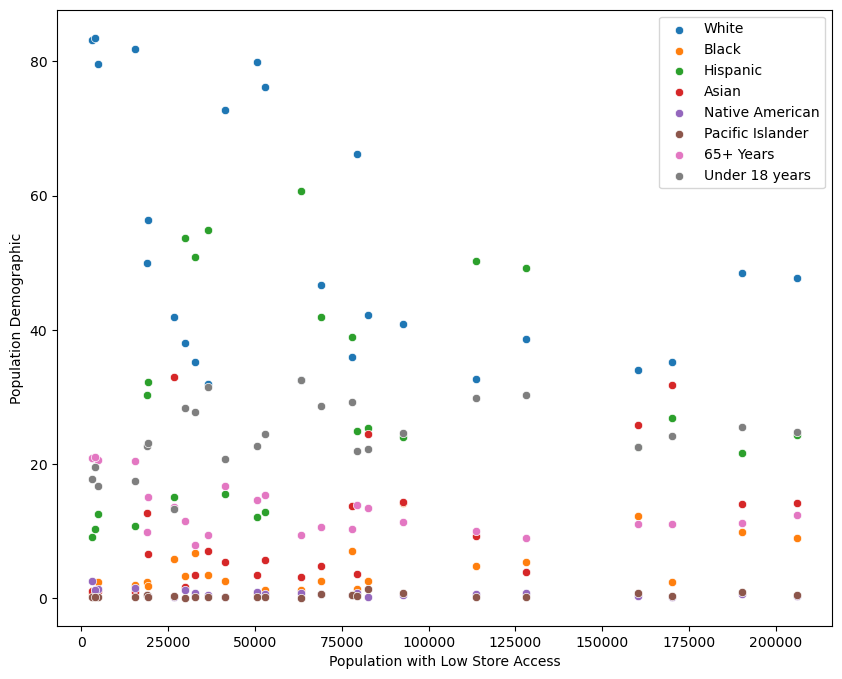

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')
# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x="2010 Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")

plt.legend()


plt.savefig('scatterplot_socioeconomics_and_food_access_data_2010', dpi=300, bbox_inches='tight')
plt.show()

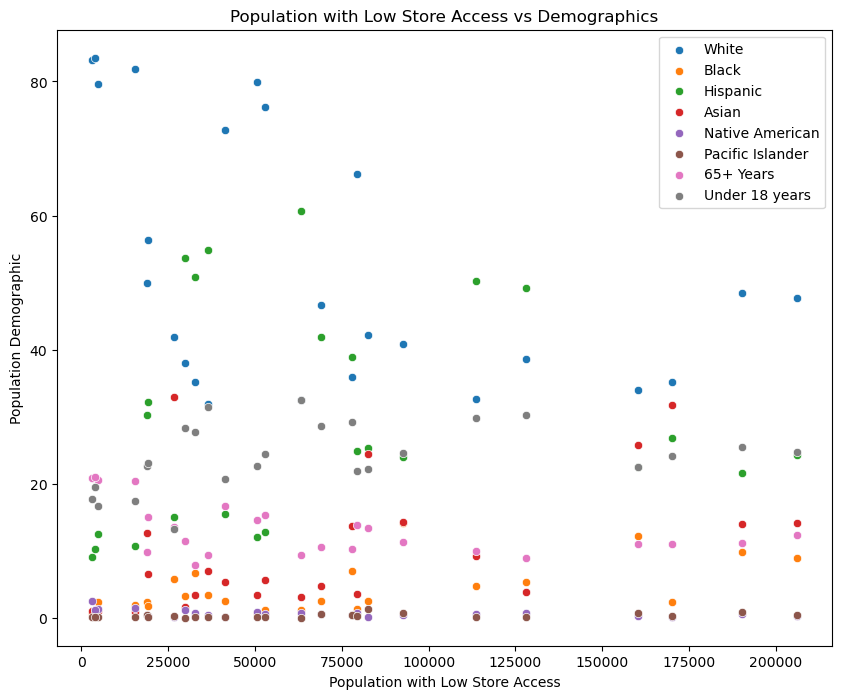

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')
# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x="2010 Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.scatterplot(x="2010 Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Population with Low Store Access")
ax.set_ylabel("Population Demographic")

plt.legend()

plt.title("Population with Low Store Access vs Demographics")

plt.savefig('scatterplot_socioeconomics_and_food_access_data_2010', dpi=300, bbox_inches='tight')
plt.show()

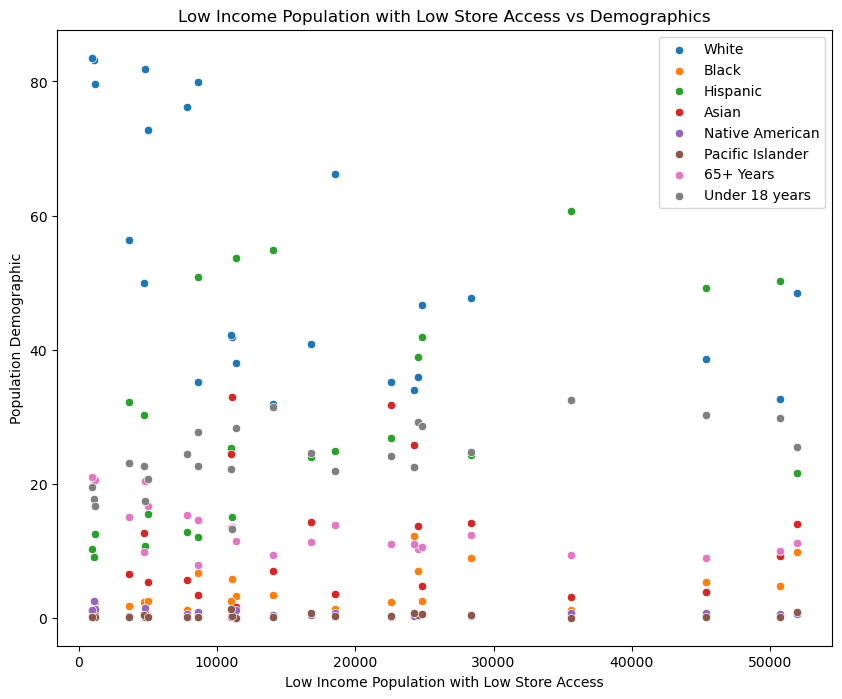

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

# Load data
socioeconomics_df = pd.read_csv('socioeconomics_df.csv')
access_df = pd.read_csv('access_df.csv')

# Merge data
merged_df = pd.merge(socioeconomics_df, access_df, on='County')
# Plot scatterplot
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% White 2010", data=merged_df, label='White')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Black 2010", data=merged_df, label='Black')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Hispanic 2010", data=merged_df, label='Hispanic')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Asian 2010", data=merged_df, label='Asian')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Native American 2010", data=merged_df, label='Native American')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Pacific Islander 2010", data=merged_df, label='Pacific Islander')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Pop 65+ Years 2010", data=merged_df, label='65+ Years')
sns.scatterplot(x="2010 Low Income Pop w/Low Store Access", y="% Pop under 18 years 2010", data=merged_df, label='Under 18 years')

ax.set_xlabel("Low Income Population with Low Store Access")
ax.set_ylabel("Population Demographic")

plt.legend()
plt.title("Low Income Population with Low Store Access vs Demographics")

plt.savefig('scatterplot_socioeconomics_and_food_access_data_low_income2010', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
!pip install mplcursors